In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Activation
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import numpy as np
import os
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import pandas as pd
import warnings

warnings.filterwarnings("ignore")


In [2]:

# Load IRIS dataset
iris_data_path = "iris/iris.data"
iris_data = pd.read_csv(
    iris_data_path,
    header=None,
    names=["sepal_length", "sepal_width", "petal_length", "petal_width", "class"],
)

# Map class labels to numerical values
class_mapping = {"Iris-setosa": 0, "Iris-versicolor": 1, "Iris-virginica": 2}
iris_data["class"] = iris_data["class"].map(class_mapping)

# Preprocess IRIS dataset
iris_X = iris_data.iloc[:, :-1].values
iris_y = iris_data["class"].values

# Split data into training and validation sets
iris_X_train, iris_X_val, iris_y_train, iris_y_val = train_test_split(
    iris_X, iris_y, test_size=0.2, random_state=42, stratify=iris_y
)

# Standardize features
scaler_iris = StandardScaler()
iris_X_train = scaler_iris.fit_transform(iris_X_train)
iris_X_val = scaler_iris.transform(iris_X_val)

# Convert labels to one-hot encoding
iris_y_train_onehot = tf.keras.utils.to_categorical(iris_y_train, num_classes=3)
iris_y_val_onehot = tf.keras.utils.to_categorical(iris_y_val, num_classes=3)





In [3]:
# Load CIFAR-10 dataset
(x_train_cifar, y_train_cifar), (x_test_cifar, y_test_cifar) = cifar10.load_data()

# Convert pixel values to between 0 and 1
x_train_cifar = x_train_cifar.astype("float32") / 255.0
x_test_cifar = x_test_cifar.astype("float32") / 255.0

# Flatten the images
x_train_cifar_flat = x_train_cifar.reshape((x_train_cifar.shape[0], -1))
x_test_cifar_flat = x_test_cifar.reshape((x_test_cifar.shape[0], -1))

# One-hot encode the labels
y_train_cifar = tf.keras.utils.to_categorical(y_train_cifar, 10)
y_test_cifar = tf.keras.utils.to_categorical(y_test_cifar, 10)

# Split data into training and validation sets
cifar_X_train, cifar_X_val, cifar_y_train, cifar_y_val = train_test_split(
    x_train_cifar_flat, y_train_cifar, test_size=0.2, random_state=42
)

# Standardize features
scaler_cifar = StandardScaler()
cifar_X_train = scaler_cifar.fit_transform(cifar_X_train)
cifar_X_val = scaler_cifar.transform(cifar_X_val)


In [4]:
# Function to create and train MLP model
def create_mlp_model(neurons, activation, input_shape):
    model = Sequential()
    model.add(Dense(neurons, input_shape=input_shape, activation=activation))
    model.add(Dense(3 if input_shape[0] == 4 else 10, activation="softmax"))

    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss="categorical_crossentropy",
        metrics=["accuracy"],
    )
    return model


# Function to train and evaluate model
def train_evaluate_model(model, X_train, y_train, X_val, y_val):
    model.fit(X_train, y_train, epochs=200, batch_size=200, verbose=0)
    _, accuracy = model.evaluate(X_val, y_val, verbose=0)

    # Predictions
    y_pred = model.predict(X_val)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(y_val, axis=1)

    # Classification Report
    report = classification_report(y_true_classes, y_pred_classes)

    return accuracy, report

In [5]:
# Experiment with different numbers of neurons and activation functions for IRIS dataset
neurons_list = [32,64,128]
activation_functions = ["relu", "LeakyReLU"]

iris_results = []

for activation in activation_functions:
    for neurons in neurons_list:
        print(
            f"\nExperimenting with {activation} activation and {neurons} neurons in hidden layer for IRIS dataset:"
        )

        model = create_mlp_model(neurons, activation, input_shape=(4,))
        accuracy, report = train_evaluate_model(
            model, iris_X_train, iris_y_train_onehot, iris_X_val, iris_y_val_onehot
        )

        iris_results.append((neurons, activation, accuracy, report))





Experimenting with relu activation and 32 neurons in hidden layer for IRIS dataset:
1/1 [==============================] - 0s 65ms/step

Experimenting with relu activation and 64 neurons in hidden layer for IRIS dataset:
1/1 [==============================] - 0s 42ms/step

Experimenting with relu activation and 128 neurons in hidden layer for IRIS dataset:
1/1 [==============================] - 0s 50ms/step

Experimenting with LeakyReLU activation and 32 neurons in hidden layer for IRIS dataset:
1/1 [==============================] - 0s 44ms/step

Experimenting with LeakyReLU activation and 64 neurons in hidden layer for IRIS dataset:
1/1 [==============================] - 0s 43ms/step

Experimenting with LeakyReLU activation and 128 neurons in hidden layer for IRIS dataset:
1/1 [==============================] - 0s 51ms/step


In [6]:

# Print results for IRIS dataset
print("\nResults for IRIS dataset:")
for result in iris_results:
    print(
        f"\nIRIS - Neurons: {result[0]}, Activation: {result[1]}, Accuracy: {result[2]:.4f}"
    )
    print("Classification Report:\n", result[3])



Results for IRIS dataset:

IRIS - Neurons: 32, Activation: relu, Accuracy: 0.8333
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.86      0.60      0.71        10
           2       0.69      0.90      0.78        10

    accuracy                           0.83        30
   macro avg       0.85      0.83      0.83        30
weighted avg       0.85      0.83      0.83        30


IRIS - Neurons: 64, Activation: relu, Accuracy: 0.9000
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.89      0.80      0.84        10
           2       0.82      0.90      0.86        10

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30


IRIS - Neurons: 128, Activation: relu, Accuracy: 0

In [7]:
# Experiment with different numbers of neurons and activation functions for CIFAR-10 dataset
cifar_results = []

for activation in activation_functions:
    for neurons in neurons_list:
        print(
            f"\nExperimenting with {activation} activation and {neurons} neurons in hidden layer for CIFAR-10 dataset:"
        )

        model = create_mlp_model(
            neurons, activation, input_shape=(x_train_cifar_flat.shape[1],)
        )
        accuracy, report = train_evaluate_model(
            model, cifar_X_train, cifar_y_train, cifar_X_val, cifar_y_val
        )

        cifar_results.append((neurons, activation, accuracy, report))


Experimenting with relu activation and 32 neurons in hidden layer for CIFAR-10 dataset:
313/313 [==============================] - 0s 1ms/step

Experimenting with relu activation and 64 neurons in hidden layer for CIFAR-10 dataset:
313/313 [==============================] - 0s 1ms/step

Experimenting with relu activation and 128 neurons in hidden layer for CIFAR-10 dataset:
313/313 [==============================] - 1s 2ms/step

Experimenting with LeakyReLU activation and 32 neurons in hidden layer for CIFAR-10 dataset:
313/313 [==============================] - 0s 1ms/step

Experimenting with LeakyReLU activation and 64 neurons in hidden layer for CIFAR-10 dataset:
313/313 [==============================] - 0s 1ms/step

Experimenting with LeakyReLU activation and 128 neurons in hidden layer for CIFAR-10 dataset:
313/313 [==============================] - 1s 2ms/step


In [8]:
# Print results for CIFAR-10 dataset
print("\nResults for CIFAR-10 dataset:")
for result in cifar_results:
    print(
        f"\nCIFAR-10 - Neurons: {result[0]}, Activation: {result[1]}, Accuracy: {result[2]:.4f}"
    )
    print("Classification Report:\n", result[3])



Results for CIFAR-10 dataset:

CIFAR-10 - Neurons: 32, Activation: relu, Accuracy: 0.4258
Classification Report:
               precision    recall  f1-score   support

           0       0.46      0.43      0.44       973
           1       0.50      0.53      0.51       979
           2       0.33      0.31      0.32      1030
           3       0.31      0.27      0.29      1023
           4       0.36      0.43      0.39       933
           5       0.37      0.33      0.35      1015
           6       0.44      0.44      0.44       996
           7       0.46      0.51      0.48       994
           8       0.54      0.59      0.56      1017
           9       0.48      0.43      0.45      1040

    accuracy                           0.43     10000
   macro avg       0.42      0.43      0.42     10000
weighted avg       0.42      0.43      0.42     10000


CIFAR-10 - Neurons: 64, Activation: relu, Accuracy: 0.4285
Classification Report:
               precision    recall  f1-scor

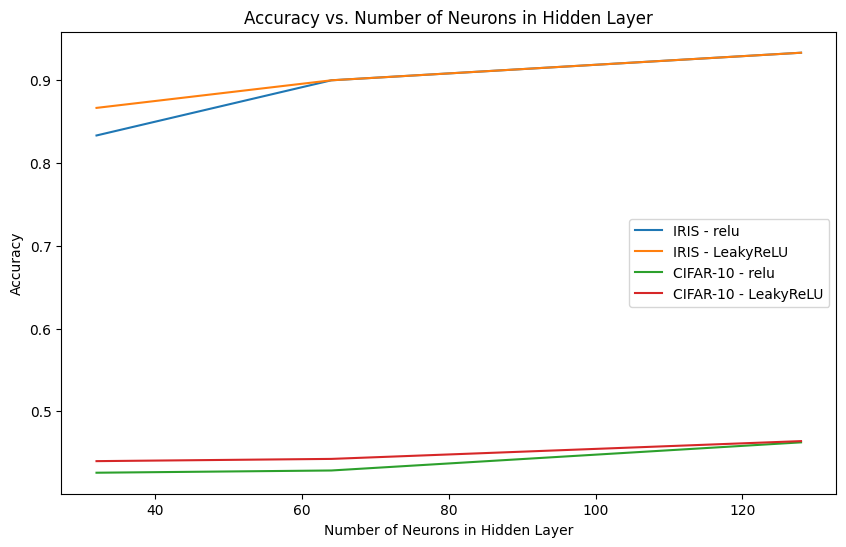

In [9]:

# Plot accuracy vs. number of neurons for IRIS dataset
plt.figure(figsize=(10, 6))

for activation in activation_functions:
    iris_activation_results = [
        result for result in iris_results if result[1] == activation
    ]
    plt.plot(
        [result[0] for result in iris_activation_results],
        [result[2] for result in iris_activation_results],
        label=f"IRIS - {activation}",
    )

# Plot accuracy vs. number of neurons for CIFAR-10 dataset
for activation in activation_functions:
    cifar_activation_results = [
        result for result in cifar_results if result[1] == activation
    ]
    plt.plot(
        [result[0] for result in cifar_activation_results],
        [result[2] for result in cifar_activation_results],
        label=f"CIFAR-10 - {activation}",
    )

plt.xlabel("Number of Neurons in Hidden Layer")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. Number of Neurons in Hidden Layer")
plt.legend()
plt.show()